# ツイートの平均ベクトル可視化

In [9]:
from pathlib import Path
import pickle

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
leaders = dict()
for name in Path("politicians").glob("*.pickle"):
    with name.open("rb") as f:
        leaders[name.stem] = pickle.load(f)
for data, key in zip(leaders.values(), leaders.keys()):
    n_data = []
    for t in data:
        n_data.append(t[2])
    leaders[key] = n_data

## 2D

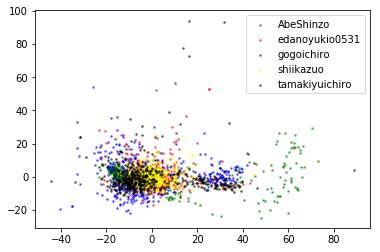

In [11]:
l_pca = dict()
for data, key in zip(leaders.values(), leaders.keys()):
        pca = PCA(n_components=2)
        pca.fit(data)
        l_pca[key] = pca.transform(data)

colors = ["green","red","blue","yellow","black","pink"]
i = 0
for l, k in zip(l_pca.values(),l_pca.keys()):
    x = [v[0] for v in l]
    y = [v[1] for v in l]
    plt.scatter(x,y,color=colors[i],marker=".",alpha=0.5,s=10,label=k)
    i += 1
plt.legend()
plt.show()

## 3D

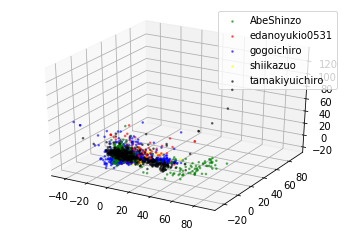

In [12]:
l_pca = dict()
for data, key in zip(leaders.values(), leaders.keys()):
        pca = PCA(n_components=3)
        pca.fit(data)
        l_pca[key] = pca.transform(data)

colors = ["green","red","blue","yellow","black","white"]
i = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for l, k in zip(l_pca.values(),l_pca.keys()):
    x = [v[0] for v in l]
    y = [v[1] for v in l]
    z = [v[2] for v in l]
    ax.scatter(x,y,z,color=colors[i],marker=".",alpha=0.5,s=10,label=k)
    i += 1
plt.legend()
plt.show()